In [3]:
library(dplyr)
library(ggplot2)
library(EnsDb.Hsapiens.v86)
library(Seurat)
library(Signac)
library(repr)
library(tidyverse)

In [4]:
parse_ecDNA_classifications <- function(ecDNA_class_file){
    ## requires a table in the format barcode(string) ecDNA1(True/False) ecDNA2(True/False) ecDNA3(True/False)
    # read tsv, set first column to row names
    ecDNA_class <- readr::read_tsv(ecDNA_class_file) %>% column_to_rownames(var='X1')
    # define a new column 'class' as a combination of the 3 ecDNA boolean columns
    ecDNA_class <- ecDNA_class %>% 
        mutate(class = dplyr::case_when(
            ecDNA1 & ecDNA2 & ecDNA3 ~ "ecDNA1,2,3",
            ecDNA1 & ecDNA2 & ! ecDNA3 ~ "ecDNA1,2",
            ecDNA1 & ! ecDNA2 & ecDNA3 ~ "ecDNA1,3",
            ! ecDNA1 & ecDNA2 & ecDNA3 ~ "ecDNA2,3",
            ecDNA1 & ! ecDNA2 & ! ecDNA3 ~ "ecDNA1",
            ! ecDNA1 & ecDNA2 & ! ecDNA3 ~ "ecDNA2",
            ! ecDNA1 & ! ecDNA2 & ecDNA3 ~ "ecDNA3",
            ! ecDNA1 & ! ecDNA2 & ! ecDNA3 ~ "no_ecDNA",
        ))
    ecDNA_class <- ecDNA_class['class']
    return(ecDNA_class)
}

parse_ecDNA_column <- function(ecDNA_class_file,ecDNA){
    # read tsv, set first column to row names
    ecDNA_class <- readr::read_tsv(ecDNA_class_file) %>% column_to_rownames(var='X1')
    ecDNA_class <- ecDNA_class[ecDNA]
    return(ecDNA_class)
}

In [6]:
file = "rcmb56-ht_seuratobj.rds"
ecDNA_class_file = "../2021-08-17_featurecounts-permutation-2/RCMB56-ht_cell-classifications.tsv"
seuratobj <- readRDS(file)

ecDNA_class_file = "../2021-08-17_featurecounts-permutation-2/RCMB56-ht_cell-classifications.tsv"
ecDNA_class <- parse_ecDNA_classifications(ecDNA_class_file)

seuratobj <- AddMetaData(seuratobj,ecDNA_class,col.name='ecDNA')

ecDNA1_col <- parse_ecDNA_column(ecDNA_class_file,'ecDNA1')
ecDNA2_col <- parse_ecDNA_column(ecDNA_class_file,'ecDNA2')
seuratobj <- AddMetaData(seuratobj,ecDNA1_col,col.name='ecDNA1')
seuratobj <- AddMetaData(seuratobj,ecDNA2_col,col.name='ecDNA2')

Warning message:
"Missing column names filled in: 'X1' [1]"

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  ecDNA1 = col_logical(),
  ecDNA2 = col_logical(),
  ecDNA3 = col_logical()
)


Warning message:
"Missing column names filled in: 'X1' [1]"

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  ecDNA1 = col_logical(),
  ecDNA2 = col_logical(),
  ecDNA3 = col_logical()
)




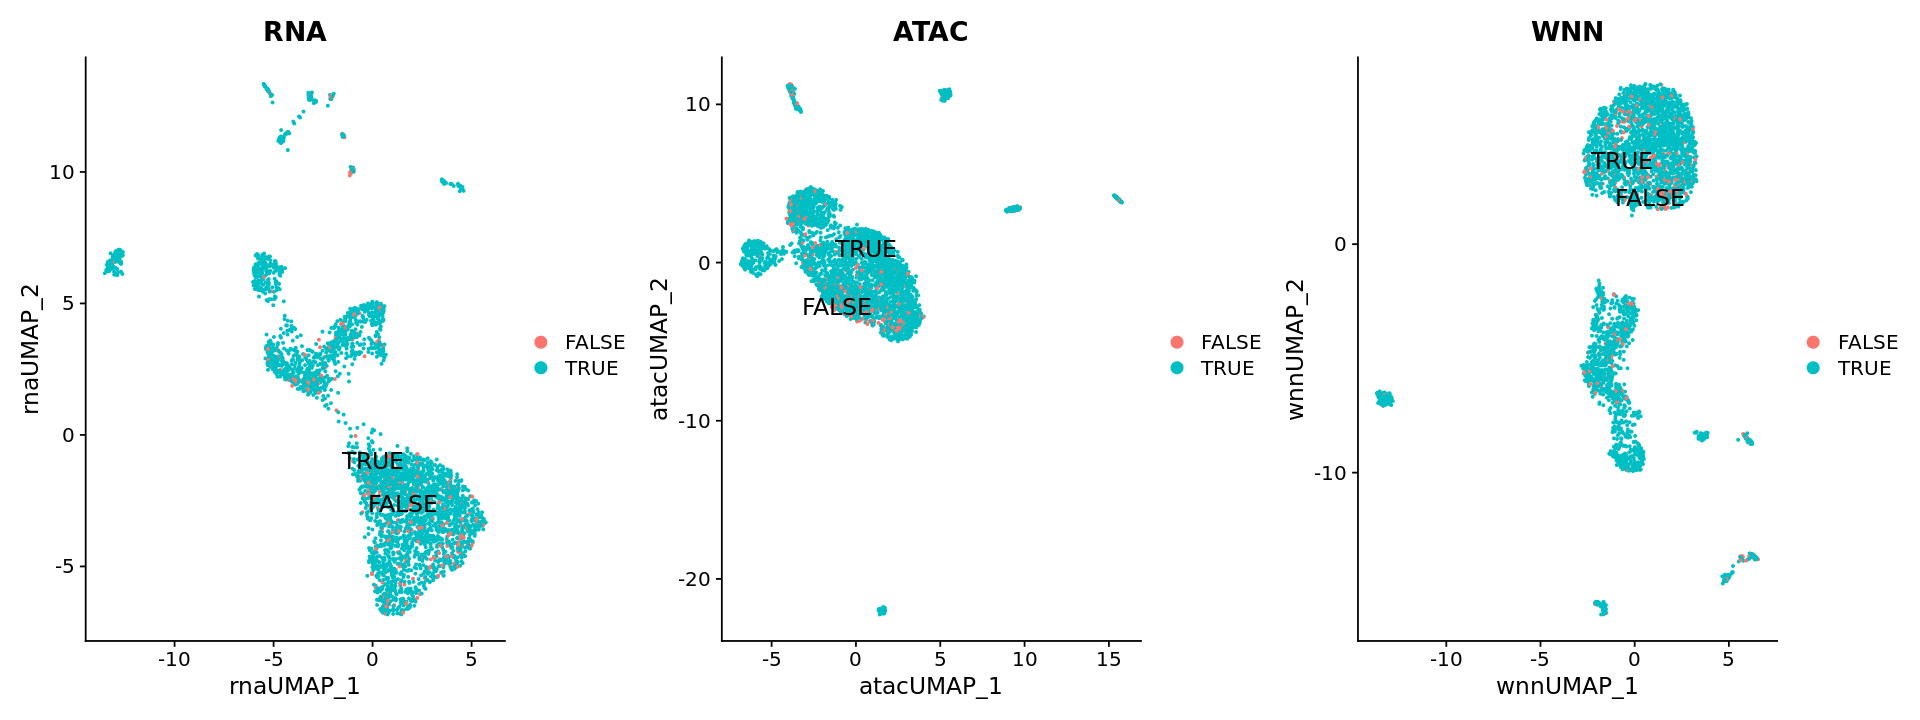

In [7]:
# Plot UMAPs
options(repr.plot.width = 16, repr.plot.height = 6)
p1 <- DimPlot(seuratobj, reduction = "umap.rna", label = TRUE, label.size = 5, repel = TRUE, group.by = "ecDNA1") + ggtitle("RNA")
p2 <- DimPlot(seuratobj, reduction = "umap.atac", label = TRUE, label.size = 5, repel = TRUE, group.by = "ecDNA1") + ggtitle("ATAC")
p3 <- DimPlot(seuratobj, reduction = "wnn.umap", label = TRUE, label.size = 5, repel = TRUE, group.by = "ecDNA1") + ggtitle("WNN")
p1 + p2 + p3  & theme(plot.title = element_text(hjust = 0.5))

In [ ]:
# Plot UMAPs
options(repr.plot.width = 16, repr.plot.height = 12)
p3  & theme(plot.title = element_text(hjust = 0.5))